# Python进行电信客户流失预警

## 商业理解

流失客户是指那些曾经使用过产品或服务，由于对产品失去兴趣等种种原因，不再使用产品或服务的顾客。

电话服务公司、互联网服务提供商、保险公司和警报监控服务公司，经常使用客户流失分析和客户流失率作为他们的关键业务指标（KPI）之一，因为留住一个老客户的成本远远低于获得一个新客户。来自这些行业的公司通常都有客户服务部门，这些部门会试图挽留流失的客户，因为对公司来说，挽留的长期客户可能比新获取的客户更有价值。

公司通常会区分主动流失和非主动流失。主动流失是指客户决定换到另一家公司或服务提供商，非主动流失是由于客户搬迁、死亡或其他情况。在大多数应用分析中，非自愿流失的原因被排除在分析模型之外。分析师倾向于关注主动流失，因为这通常是可以由公司控制的与客户相关的行为因素造成的，比如如何处理账单或如何提供售后服务。

预测分析使用客户流失预测模型，通过评估客户流失的风险倾向来预测客户流失。由于这些模型生成了一个流失概率排序名单，对于潜在的高概率流失客户，他们可以有效地实施客户保留营销计划。

## 数据理解

此次分析数据来自于IBM Sample Data Sets，统计自某电信公司一段时间内的消费数据。共有7043笔客户资料，每笔客户资料包含21个字段，其中1个客户ID字段，19个输入字段及1个目标字段-Churn（Yes代表流失，No代表未流失），输入字段主要包含以下三个维度指标：用户画像指标、消费产品指标、消费信息指标。字段的具体说明如下：

字段|字段翻译|角色|测量类型|不同值个数
---|:--:|---:|--:|--:
customerID |客户ID|ID|无类型|7043
gender |性别|输入|分类|2
SeniorCitizen |老年人|输入|分类|2
Partner |是否有配偶|输入|分类|2
Dependents |是否经济独立|输入|分类|2
tenure |在网时长|输入|数值|73
PhoneService |是否开通电话服务业务|输入|分类|2
MultipleLines |是否开通多线业务|输入|分类|3
InternetService |是否开通互联网服务|输入|分类|3
OnlineSecurity |是否开通网络安全服务|输入|分类|3
OnlineBackup |是否开通在线备份业务|输入|分类|3
DeviceProtection|是否开通了设备保护业务|输入|分类|3
TechSupport |是否开通了技术支持服务|输入|分类|3
StreamingTV |是否开通网络电视|输入|分类|3
StreamingMovies |是否开通网络电影|输入|分类|3
Contract |签订合同方式|输入|分类|3
PaperlessBilling |是否开通电子账单|输入|分类|2
PaymentMethod |付款方式|输入|分类|4
MonthlyCharges |月费用|输入|数值|1585
TotalCharges |总费用|输入|数值|6531
Churn |是否流失|目标|分类|2

## 数据读入和概览

In [1]:
# 数据处理
import numpy as np 
import pandas as pd 

# 可视化
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py 
import plotly.graph_objs as go 
import plotly.figure_factory as ff 

# 前处理
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 建模
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 模型评估
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, scorer
from sklearn.metrics import recall_score, precision_score, f1_score, cohen_kappa_score

pd.set_option('display.max_columns', None) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# 读入数据
df = pd.read_csv('./Telco-Customer-Churn.csv')
df.head()  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## 数据初步清洗

首先进行初步的数据清洗工作，包含错误值和异常值处理，并划分类别型和数值型字段类型，其中清洗部分包含：

1. OnlineSecurity、OnlineBackup、DeviceProtection、TechSupport、StreamingTV、StreamingMovies：错误值处理
2. TotalCharges：异常值处理
3. tenure：自定义分箱
4. 定义类别型和数值型字段

In [4]:
# 错误值处理
repl_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport','StreamingTV', 'StreamingMovies']

for i in repl_columns:
    df[i]  = df[i].replace({'No internet service' : 'No'}) 

# 替换值SeniorCitizen
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1: "Yes", 0: "No"}) 

# 替换值TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan) 

# TotalCharges空值：数据量小，直接删除
df = df.dropna(subset=['TotalCharges']) 
df.reset_index(drop=True, inplace=True)  # 重置索引

# 转换数据类型
df['TotalCharges'] = df['TotalCharges'].astype('float')

# 转换tenure
def transform_tenure(x):
    if x <= 12:
        return 'Tenure_1'
    elif x <= 24:
        return 'Tenure_2'
    elif x <= 36:
        return 'Tenure_3'
    elif x <= 48:
        return 'Tenure_4'
    elif x <= 60:
        return 'Tenure_5'
    else:
        return 'Tenure_over_5' 

df['tenure_group'] = df.tenure.apply(transform_tenure)

# 数值型和类别型字段
Id_col = ['customerID']
target_col = ['Churn']

cat_cols = df.nunique()[df.nunique() < 10].index.tolist() 
num_cols = [i for i in df.columns if i not in cat_cols + Id_col] 

print('类别型字段：\n', cat_cols)
print('-' * 30) 
print('数值型字段：\n', num_cols)

类别型字段：
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure_group']
------------------------------
数值型字段：
 ['tenure', 'MonthlyCharges', 'TotalCharges']


## 探索性分析

对指标进行归纳梳理，分用户画像指标，消费产品指标，消费信息指标。探索影响用户流失的关键因素。

### 描述性分析

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


用户的评价月消费金额为64元，总费用平均值为2283元。

### 目标变量Churn分布

In [6]:
df['Churn'].value_counts() 

No     5163
Yes    1869
Name: Churn, dtype: int64

In [7]:
trace0 = go.Pie(labels=df['Churn'].value_counts().index, 
                values=df['Churn'].value_counts().values,
                hole=.5,
                rotation=90,
                marker=dict(colors=['rgb(154,203,228)', 'rgb(191,76,81)'], 
                            line=dict(color='white', width=1.3))
               )
data = [trace0] 
layout = go.Layout(title='目标变量Churn分布')

fig = go.Figure(data=data, layout=layout)
py.offline.plot(fig, filename='./html/整体流失情况分布.html')

'./html/整体流失情况分布.html'

经过初步清洗之后的数据集大小为7032条记录，其中流失客户为1869条，占比26.6%，未流失客户占比73.4%。

### 性别与是否流失

In [14]:
def plot_bar(input_col: str, target_col: str, title_name: str):
    cross_table = round(pd.crosstab(df[input_col], df[target_col], normalize='index')*100, 2)

    # 索引
    index_0 = cross_table.columns.tolist()[0] 
    index_1 = cross_table.columns.tolist()[1] 

    # 绘图轨迹
    trace0 = go.Bar(x=cross_table.index.tolist(), 
                    y=cross_table[index_0].values.tolist(), 
                    name=index_0,
                    orientation='v',
                    marker=dict(color='rgb(154,203,228)')
                   ) 
    trace1 = go.Bar(x=cross_table.index.tolist(), 
                    y=cross_table[index_1].values.tolist(), 
                    name=index_1,
                    orientation='v',
                    marker=dict(color='rgb(191,76,81)')
                   ) 

    data = [trace0, trace1] 
    # 布局
    layout = go.Layout(title=title_name, bargap=0.4, barmode='stack')
    
    # 画布
    fig = go.Figure(data=data, layout=layout)
    # 绘图
    py.offline.plot(fig, filename=f'./html/{title_name}.html') 

In [17]:
def plot_bar(input_col: str, target_col: str, title_name: str):
    cross_table = round(pd.crosstab(df[input_col], df[target_col], normalize='index')*100, 2)

    # 索引
    index_0 = cross_table.columns.tolist()[0] 
    index_1 = cross_table.columns.tolist()[1] 

    # 绘图轨迹
    trace0 = go.Bar(x=cross_table[index_0].values.tolist(),
                    y=cross_table.index.tolist(), 
                    name=index_0,
                    orientation='h',
                    marker=dict(color='rgb(154,203,228)')
                   ) 
    trace1 = go.Bar(x=cross_table[index_1].values.tolist(),  
                    y=cross_table.index.tolist(),
                    name=index_1,
                    orientation='h',
                    marker=dict(color='rgb(191,76,81)')
                   ) 

    data = [trace0, trace1] 
    # 布局
    layout = go.Layout(title=title_name, bargap=0.4, barmode='stack')
    
    # 画布
    fig = go.Figure(data=data, layout=layout)
    # 绘图
    py.offline.plot(fig, filename=f'./html/{title_name}.html') 

In [18]:
pd.crosstab(df['gender'], df['Churn']) 

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


In [19]:
plot_bar(input_col='gender', target_col='Churn', title_name='性别与是否流失的关系') 

结论：

男性和女性在客户流失比例上没有显著差异。

### 老年用户与是否流失

In [64]:
pd.crosstab(df['SeniorCitizen'], df['Churn']) 

Churn,No,Yes
SeniorCitizen,,
No,4497,1393
Yes,666,476


In [65]:
plot_bar(input_col='SeniorCitizen', target_col='Churn', title_name='老年用户与是否流失的关系') 

结论：

老年用户流失比例更高，为41.68%，比非老年用户高近两倍，此部分原因有待进一步探讨。

### 是否经济独立与是否流失

In [66]:
pd.crosstab(df['Dependents'], df['Churn']) 

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1773,326


In [67]:
plot_bar(input_col='Dependents', target_col='Churn', title_name='是否经济独立与是否流失的关系') 

结论：

从经济独立情况来看，经济未独立的用户流失率要远远高于经济独立的用户。

### 是否有配偶与是否流失

In [68]:
pd.crosstab(df['Partner'], df['Churn'])  

Churn,No,Yes
Partner,,
No,2439,1200
Yes,2724,669


In [69]:
plot_bar(input_col='Partner', target_col='Churn', title_name='是否有配偶与是否流失的关系') 

结论：

从婚姻情况来看，数据显示，未婚人群中流失的比例比已婚人数高出13%。

### 在网时长与是否流失

In [21]:
pd.crosstab(df['tenure_group'], df['Churn']) 

Churn,No,Yes
tenure_group,,
Tenure_1,1138,1037
Tenure_2,730,294
Tenure_3,652,180
Tenure_4,617,145
Tenure_5,712,120
Tenure_over_5,1314,93


In [22]:
plot_bar(input_col='tenure_group', target_col='Churn', title_name='在网时长与是否流失的关系') 

结论：

1. 用户的在网时长越长，表示用户的忠诚度越高，其流失的概率越低；
3. 新用户在1年内的流失率显著高于整体流失率，为47.68%。

### 是否开通电话服务业务与是否流失

In [171]:
pd.crosstab(df['PhoneService'], df['Churn']) 

Churn,No,Yes
PhoneService,,
No,510,170
Yes,4653,1699


In [74]:
plot_bar(input_col='PhoneService', target_col='Churn', title_name='是否开通电话服务业务与是否流失关系')  

结论：

在手机服务中，订购电话服务业务的用户群流失率基本上与未订购用户流失率基本持平，未订购电话服务业务的用户较少。

### 是否开通多线业务与是否流失

In [175]:
pd.crosstab(df['MultipleLines'], df['Churn']) 

Churn,No,Yes
MultipleLines,,
No,2536,849
No phone service,510,170
Yes,2117,850


In [75]:
plot_bar(input_col='MultipleLines', target_col='Churn', title_name='是否开通多线业务与是否流失关系') 

结论：

在手机服务中，订购MultipleLines的用户流失率比未订购用户稍高。

### 互联网服务与是否流失

In [77]:
pd.crosstab(df['InternetService'], df['Churn']) 

Churn,No,Yes
InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


In [78]:
plot_bar(input_col='InternetService', target_col='Churn', title_name='是否开通互联网服务与是否流失关系') 

结论：

在网络服务中，开通互联网服务的用户流失概率显著高于未开通用户，其中订购fiber optic光纤网络的流失比例高达41.89%，高于订购DSL数字网络用户。

### 技术性服务与是否流失

In [81]:
plot_bar(input_col='OnlineSecurity', target_col='Churn', title_name='是否开通网络安全服务与是否流失关系') 
plot_bar(input_col='OnlineBackup', target_col='Churn', title_name='是否开通在线备份业务与是否流失关系') 
plot_bar(input_col='DeviceProtection', target_col='Churn', title_name='是否开通了设备保护业务与是否流失关系') 
plot_bar(input_col='TechSupport', target_col='Churn', title_name='是否开通了技术支持服务与是否流失关系') 

结论：

技术性服务（OnlineSecurity、OnlineBackup、DeviceProtection、TechSupport）中订购的用户流失率均比未订购流失率低，而未订购的流失率较高。

### 娱乐性服务与是否流失

In [82]:
plot_bar(input_col='StreamingTV', target_col='Churn', title_name='是否开通网络电视与是否流失关系') 
plot_bar(input_col='StreamingMovies', target_col='Churn', title_name='是否开通网络电影与是否流失关系') 

结论：

娱乐性服务（StreamingTV、StreamingMovies）上，订购的流失率都比未订购流失率高。

### 签订合同方式与是否流失

In [85]:
pd.crosstab(df['Contract'], df['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


In [84]:
plot_bar(input_col='Contract', target_col='Churn', title_name='签订合同方式与是否流失与是否流失关系') 

结论：

合同期限上，签订时间越长，代表用户忠诚度越高，流失率越低，其中选择月签的用户流失率最高，达到42.71%。选择两年签的用户在总体中占比为23.96%，流失概率仅为2.85%。

### 是否开通电子账单与是否流失

In [90]:
pd.crosstab(df['PaperlessBilling'], df['Churn']) 

Churn,No,Yes
PaperlessBilling,,
No,2395,469
Yes,2768,1400


In [88]:
plot_bar(input_col='PaperlessBilling', target_col='Churn', title_name='是否开通电子账单与是否流失关系') 

结论：

开通电子账单用户的流失率显著高于选择纸质账单的用户。

### 付款方式与是否流失

In [91]:
pd.crosstab(df['PaymentMethod'], df['Churn']) 

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [89]:
plot_bar(input_col='PaymentMethod', target_col='Churn', title_name='付款方式与是否流失关系') 

结论：

支付方式上，支付上，选择电子支票支付方式的用户流失最高，达到45.29%，其他三种支付方式的流失率相差不大。

### 月费用与是否流失

In [121]:
def plot_histogram(input_col: str, title_name: str):
    churn_num = df[df['Churn'] == 'Yes'][input_col]
    not_churn_num = df[df['Churn'] == 'No'][input_col] 
    
    # 图形轨迹
    trace0 = go.Histogram(x=churn_num, 
                          bingroup=25,
                          histnorm='percent',
                          name='流失客户',
                          marker=dict(color='rgb(191,76,81)')
                         )
    trace1 = go.Histogram(x=not_churn_num, 
                          bingroup=25,
                          histnorm='percent',
                          name='未流失客户',
                          marker=dict(color='rgb(154,203,228)')
                         )

    data = [trace0, trace1]
    layout = go.Layout(title=title_name)

    fig = go.Figure(data=data, layout=layout)
    py.offline.plot(fig, filename=f'./html/{title_name}.html') 

In [122]:
plot_histogram(input_col='MonthlyCharges', title_name='月费用与是否流失关系')

结论：

整体来看，随着月费用的增加，流失用户的比例呈现高高低低的变化，月消费80-100元的用户相对较高。

### 总费用与是否流失

In [123]:
plot_histogram(input_col='TotalCharges', title_name='总费用与是否流失关系')

结论：

随着总费用的增加，流失概率有降低的趋势，其中总费用在0~200元的流失占比较高，达44%。

### 数值型属性相关性

In [141]:
plt.figure(figsize=(15, 10))  
sns.heatmap(df.corr(), linewidths=0.1, cmap='tab20c_r', annot=True)
plt.title('数值型属性的相关性', fontdict={'fontsize': 'xx-large', 'fontweight':'heavy'}) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show() 

从相关性矩阵图可以看出，用户的往来期间和总费用呈现高度相关，往来期间越长，则总费用越高。月消费和总消费呈现显著相关。

## 特征选择

In [82]:
# 删除tenure
df = df.drop('tenure', axis=1) 

from feature_selection import Feature_select

# 划分X和y
X = df.drop(['customerID', 'Churn'], axis=1) 
y = df['Churn']   

fs = Feature_select(num_method='anova', cate_method='kf', pos_label='Yes')
x_sel = fs.fit_transform(X, y)  

2020 09:30:02 INFO attr select success!


After select attr: ['DeviceProtection', 'MultipleLines', 'OnlineSecurity', 'TechSupport', 'tenure_group', 'PaperlessBilling', 'InternetService', 'PaymentMethod', 'SeniorCitizen', 'MonthlyCharges', 'Dependents', 'Partner', 'Contract', 'StreamingTV', 'TotalCharges', 'StreamingMovies', 'OnlineBackup']


经过特征筛选，gender和PhoneService字段被去掉。

## 建模前处理

为满足python建模需要，需要对数据做以下处理。

1. 对于分类变量，编码为0和1;
2. 对于多分类变量，进行哑变量转换；
3. 对于数值型变量，部分模型如KNN、神经网络、Logistic需要进行标准化处理。

In [168]:
# 筛选变量
select_features = x_sel.columns

# 建模数据
df_model = pd.concat([df['customerID'], df[select_features], df['Churn']], axis=1)

Id_col = ['customerID']
target_col = ['Churn']

# 分类型
cat_cols = df_model.nunique()[df_model.nunique() < 10].index.tolist() 
# 二分类属性
binary_cols = df_model.nunique()[df_model.nunique() == 2].index.tolist()
# 多分类属性
multi_cols = [i for i in cat_cols if i not in binary_cols] 

# 数值型
num_cols = [i for i in df_model.columns if i not in cat_cols + Id_col] 

# 二分类-标签编码
le = LabelEncoder()

for i in binary_cols:
    df_model[i] = le.fit_transform(df_model[i]) 
    
# 多分类-哑变量转换
df_model = pd.get_dummies(data=df_model, columns=multi_cols) 
df_model.head() 

,customerID,DeviceProtection,OnlineSecurity,TechSupport,PaperlessBilling,SeniorCitizen,MonthlyCharges,Dependents,Partner,StreamingTV,TotalCharges,StreamingMovies,OnlineBackup,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,tenure_group_Tenure_1,tenure_group_Tenure_2,tenure_group_Tenure_3,tenure_group_Tenure_4,tenure_group_Tenure_5,tenure_group_Tenure_over_5,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,0,1,0,29.85,0,1,0,29.85,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,1,1,0,0,0,56.95,0,0,0,1889.50,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
2,3668-QPYBK,0,1,0,1,0,53.85,0,0,0,108.15,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,1,1,1,0,0,42.30,0,0,0,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,9237-HQITU,0,0,0,1,0,70.70,0,0,0,151.65,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


## 模型建立和评估

首先划分训练集和测试集

In [103]:
# 重新划分
X = df_model.drop(['customerID', 'Churn'], axis=1) 
y = df_model['Churn']  

# 分层抽样
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

#修正索引
for i in [X_train, X_test, y_train, y_test]:
    i.index = range(i.shape[0]) 

(5625, 31) (1407, 31) (5625,) (1407,)


In [105]:
# 保存标准化训练和测试数据
st = StandardScaler()
num_scaled_train = pd.DataFrame(st.fit_transform(X_train[num_cols]), columns=num_cols)
num_scaled_test = pd.DataFrame(st.transform(X_test[num_cols]), columns=num_cols) 

X_train_sclaed = pd.concat([X_train.drop(num_cols, axis=1), num_scaled_train], axis=1)
X_test_sclaed = pd.concat([X_test.drop(num_cols, axis=1), num_scaled_test], axis=1) 

然后建立一系列基准模型并比较效果。

In [162]:
def model_report(model, X_train, X_test, y_train, y_test, name) :
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test) 
    
    # 评估指标
    accuracy = accuracy_score(y_test, y_pred)
    recallscore = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred) 
    kappa_metric = cohen_kappa_score(y_test, y_pred)
    
    # 保存数据
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

# 实例模型
logit = LogisticRegression() 

knn = KNeighborsClassifier(n_neighbors=5) 

svc_lin  = SVC(kernel='linear', random_state=0) 

svc_rbf  = SVC(kernel='rbf', random_state=0) 

mlp_model = MLPClassifier(hidden_layer_sizes=(8,), alpha=0.05, max_iter=50000, 
                          activation='logistic', random_state=0)

gnb = GaussianNB()

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)  

rfc = RandomForestClassifier(n_estimators=100, random_state=0) 

lgbm_c = LGBMClassifier(boosting_type='gbdt', n_estimators=100, random_state=0) 

xgc = XGBClassifier(n_estimators=100, eta=0.02, max_depth=15, random_state=0, learning_rate=0.001)

# 调用函数
model1 = model_report(logit, X_train_sclaed, X_test_sclaed, y_train, y_test,
                      "Logistic Regression")
model2 = model_report(knn, X_train_sclaed, X_test_sclaed, y_train, y_test,
                      "KNN Classifier")
model3 = model_report(svc_lin, X_train_sclaed, X_test_sclaed, y_train, y_test,
                      "SVM Classifier Linear")
model4 = model_report(svc_rbf, X_train_sclaed, X_test_sclaed, y_train, y_test,
                      "SVM Classifier RBF")
model5 = model_report(mlp_model, X_train_sclaed, X_test_sclaed, y_train, y_test,
                      "MLP Classifier")
model6 = model_report(gnb, X_train, X_test, y_train, y_test,
                      "Naive Bayes")
model7 = model_report(decision_tree, X_train, X_test, y_train, y_test,
                      "Decision Tree")
model8 = model_report(rfc, X_train, X_test, y_train, y_test,
                      "Random Forest Classifier")
model9 = model_report(lgbm_c, X_train, X_test, y_train, y_test,
                      "LGBM Classifier") 
model10 = model_report(xgc, X_train, X_test, y_train, y_test,
                      "XGBoost Classifier")

# 拼接表
model_performances = pd.concat([model1, model2, model3,
                                model4, model5, model6,
                                model7, model8, model9, model10], axis=0).reset_index()

model_performances = model_performances.drop(columns="index",axis =1)

table  = ff.create_table(np.round(model_performances, 4))

py.offline.iplot(table) 

假设我们关注roc指标，从模型表现效果来看，Naive Bayes效果最好。

我们也可以对模型进行进一步优化，比如对决策树参数进行调优。

In [163]:
parameters = {'splitter': ('best','random'),
              'criterion': ("gini","entropy"),
              "max_depth": [*range(3, 20)],
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, scoring='f1', cv=10)
GS.fit(X_train, y_train)

print(GS.best_params_) 

print(GS.best_score_) 

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
0.585900839405024


In [164]:
clf = GS.best_estimator_

test_pred = clf.predict(X_test)
print('测试集：\n', classification_report(y_test, test_pred)) 

测试集：
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1033
           1       0.61      0.61      0.61       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



将这颗树绘制出来。

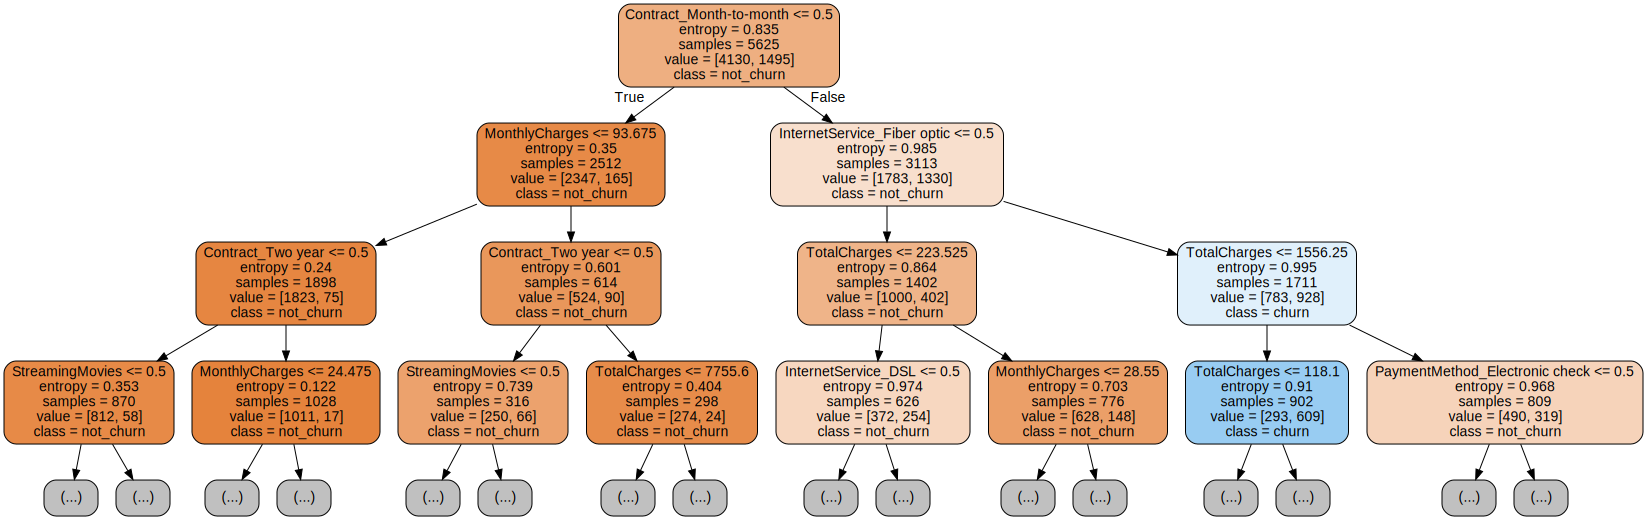

In [170]:
import graphviz

dot_data = tree.export_graphviz(decision_tree=clf, max_depth=3,
                                 out_file=None, 
                                 feature_names=X_train.columns,
                                 class_names=['not_churn', 'churn'], 
                                 filled=True,
                                 rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

输出决策树属性重要性排序：

In [166]:
imp = pd.DataFrame(zip(X_train.columns, clf.feature_importances_))
imp.columns = ['feature', 'importances']
imp = imp.sort_values('importances', ascending=False)
imp = imp[imp['importances'] != 0]

table  = ff.create_table(np.round(imp, 4))
py.offline.iplot(table)  

后续优化方向：

1. 数据：分类技术应用在目标类别分布越均匀的数据集时，其所建立之分类器通常会有比较好的分类效能。针对数据在目标字段上分布不平衡，可采用过采样和欠采样来处理类别不平衡问题；
2. 属性：进一步属性筛选方法和属性组合；
3. 算法：参数调优；调整预测门槛值来增加预测效能。